<a href="https://colab.research.google.com/github/BintangPray/MPDW_Peramalann/blob/main/LSTM_Cabaii.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##READ DATA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from google.colab import files
from tensorflow.keras.optimizers import Adam

In [ ]:
data = pd.read_excel('Residual.xlsx')
data = data.loc[:, ['Tanggal', 'Residual']]
data = data.iloc[1:].reset_index(drop=True)
print(data.head())

     Tanggal  Residual
0 2022-09-02    4310.0
1 2022-09-03    2150.0
2 2022-09-04    2620.0
3 2022-09-05     760.0
4 2022-09-06   -1870.0


Jumlah data latih: 578
Jumlah data uji: 121


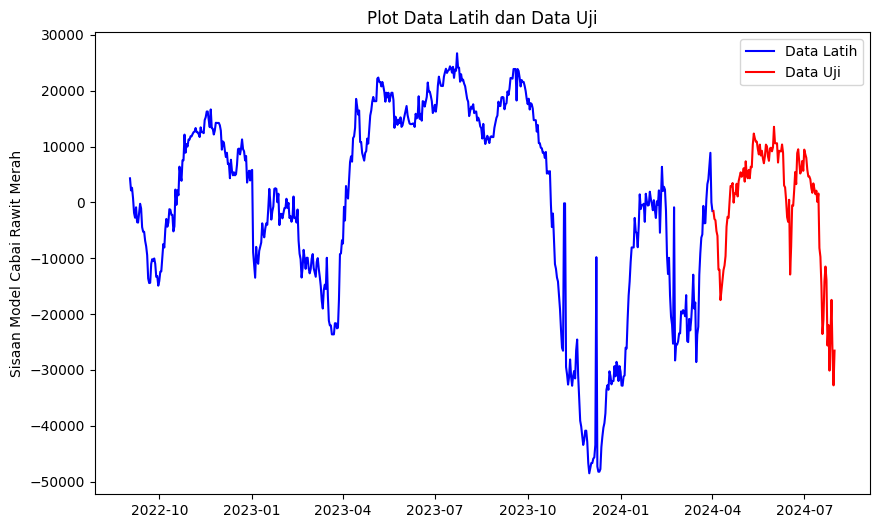

In [ ]:
##EKSPLORASI DATA

# Memisahkan data menjadi data latih dan data uji
train_data = data.iloc[:578]
test_data = data.iloc[578:]

# Menampilkan jumlah data dalam setiap bagian untuk memastikan pemisahan yang benar
print("Jumlah data latih:", len(train_data))
print("Jumlah data uji:", len(test_data))
# Membuat plot data latih dan data uji
plt.figure(figsize=(10, 6))
plt.plot(train_data['Tanggal'], train_data['Residual'], label='Data Latih', color='blue')
plt.plot(test_data['Tanggal'], test_data['Residual'], label='Data Uji', color='red')
plt.title('Plot Data Latih dan Data Uji')
plt.ylabel('Sisaan Model Cabai Rawit Merah')
plt.legend()
plt.show()

In [ ]:
##LSTM DAN TUNNING PARAMETER EPOCH

import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense



# Mengambil kolom BawangMerah sebagai data yang akan diprediksi
time_series_data = data['Residual'].values.reshape(-1, 1)

# Normalisasi data ke rentang 0-1
scaler = MinMaxScaler()
time_series_data = scaler.fit_transform(time_series_data)

# Membagi dataset menjadi data latih dan data uji
train_size = 578
test_size = len(time_series_data) - train_size

train_data = time_series_data[:train_size]
test_data = time_series_data[train_size:]

# Fungsi untuk membuat dataset dengan sekuens deret waktu
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i : i + seq_length])
    return np.array(sequences)

# Panjang sekuens deret waktu (jumlah waktu sebelum prediksi)
seq_length = 5

# Membuat dataset dengan sekuens deret waktu
X_train = create_sequences(train_data, seq_length)
X_test = create_sequences(test_data, seq_length)

# Memisahkan fitur dan target
y_train = X_train[:, -1]
X_train = X_train[:, :-1]
y_test = X_test[:, -1]
X_test = X_test[:, :-1]

# Reshaping data untuk LSTM (jumlah sampel, panjang sekuens, jumlah fitur)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
# Fungsi untuk membuat model LSTM

def create_model():
    optimizer = Adam(learning_rate=0.005)
    model = Sequential()
    model.add(LSTM(40, activation='relu', input_shape=(seq_length - 1, 1)))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mse')
    return model

# Fungsi untuk menghitung AIC
def calculate_aic(n, mse, num_params):
    aic = n * np.log(mse) + 2 * num_params
    return aic

# Inisialisasi model
model = create_model()

# List untuk menyimpan nilai AIC pada setiap epoch
aic_values = []

# Jumlah epoch yang akan diuji
epochs_to_test = [10, 50, 100, 150, 200, 250]

# Melatih model sambil menghitung AIC hanya pada epoch yang diinginkan
for epoch in epochs_to_test:
    history = model.fit(X_train, y_train, epochs=epoch, batch_size=32, verbose=0)

    # Prediksi dengan model
    y_pred = model.predict(X_test)

    # Menghitung MSE
    mse = mean_squared_error(y_test, y_pred)

    # Menghitung AIC
    n = len(y_test)
    num_params = len(model.trainable_weights)  # Jumlah parameter model, bisa berbeda tergantung arsitektur
    aic = calculate_aic(n, mse, num_params)

    # Menyimpan nilai AIC
    aic_values.append(aic)
    print(f"Epoch {epoch} - AIC: {aic}")

# Menampilkan nilai AIC per epoch yang diuji
print(aic_values)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Epoch 10 - AIC: -657.7024650747804
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Epoch 50 - AIC: -686.862193190796
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Epoch 100 - AIC: -702.2826858105019
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Epoch 150 - AIC: -695.2138833766987
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Epoch 200 - AIC: -689.2395499243596
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Epoch 250 - AIC: -699.8402790067729
[-657.7024650747804, -686.862193190796, -702.2826858105019, -695.2138833766987, -689.2395499243596, -699.8402790067729]


In [ ]:
print(X_train)

[[[0.70224644]
  [0.67353449]
  [0.679782  ]
  [0.65505782]]

 [[0.67353449]
  [0.679782  ]
  [0.65505782]
  [0.62009837]]

 [[0.679782  ]
  [0.65505782]
  [0.62009837]
  [0.60853383]]

 ...

 [[0.59564004]
  [0.65200053]
  [0.68842217]
  [0.70011963]]

 [[0.65200053]
  [0.68842217]
  [0.70011963]
  [0.73162302]]

 [[0.68842217]
  [0.70011963]
  [0.73162302]
  [0.76299349]]]


In [ ]:
###LSTM FINAL DENGAN EPOCH TERBAIK

# Membangun model LSTM
optimizer = Adam(learning_rate=0.005)
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length - 1, 1)))
model.add(Dense(1))
model.compile(optimizer=optimizer, loss='mse')
# Melatih model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=10)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78/100
Epoch 7

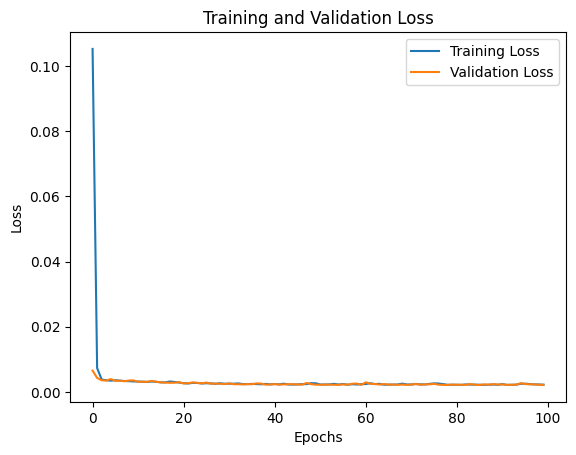

In [ ]:
# Plot loss pada setiap epoch
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


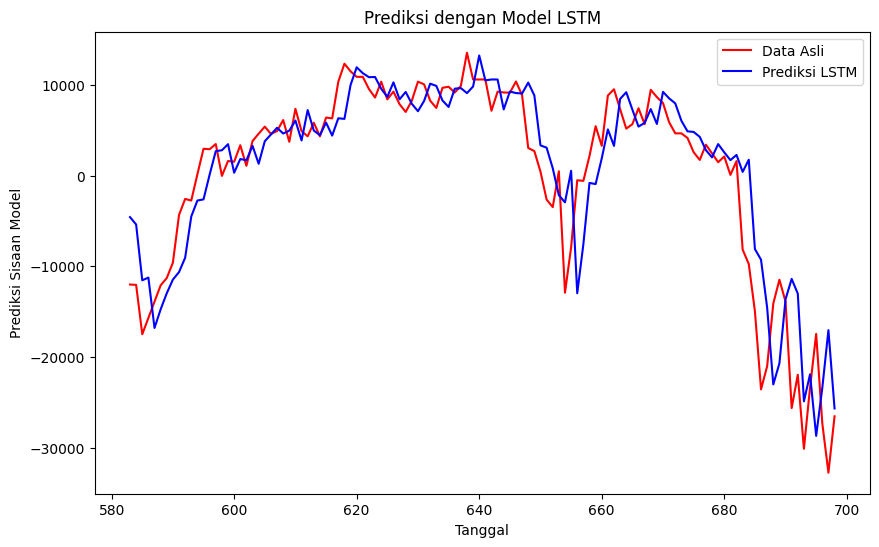

In [ ]:
# Membuat prediksi dengan model LSTM
predicted = model.predict(X_test)

# Invers transform hasil prediksi ke skala aslinya
predictLSTM = scaler.inverse_transform(np.concatenate((X_test[:, -1], predicted.reshape(-1, 1)), axis=1))[:, 1]

# Plot hasil prediksi
plt.figure(figsize=(10, 6))
plt.plot(data.index[train_size + seq_length:], data['Residual'].values[train_size + seq_length:], label='Data Asli', color='red')
plt.plot(data.index[train_size + seq_length:], predictLSTM, label='Prediksi LSTM', color='blue')
plt.title('Prediksi dengan Model LSTM')
plt.xlabel('Tanggal')
plt.ylabel('Prediksi Sisaan Model')
plt.legend()
plt.show()


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


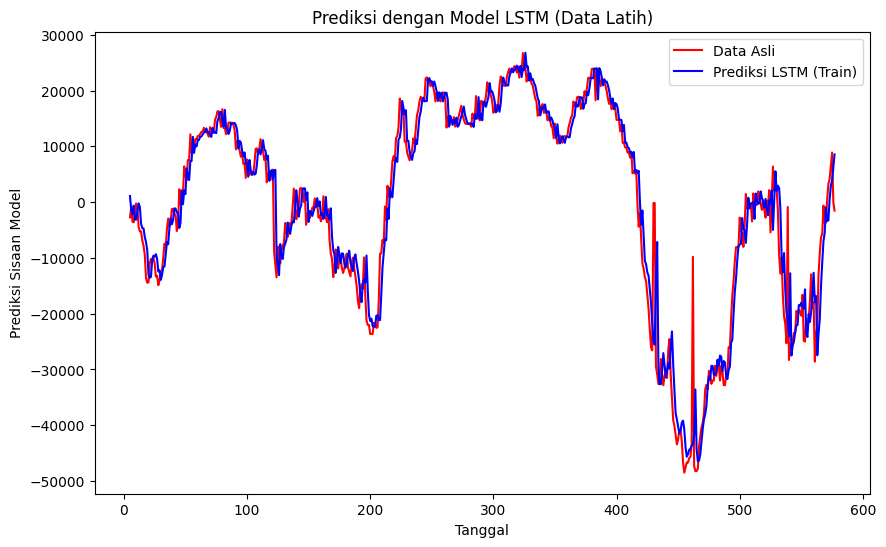

In [ ]:
# Membuat prediksi dengan model LSTM pada data latih
predicted_train = model.predict(X_train)

# Invers transform hasil prediksi pada data latih ke skala aslinya
predictLSTM_train = scaler.inverse_transform(np.concatenate((X_train[:, -1], predicted_train.reshape(-1, 1)), axis=1))[:, 1]

# Sesuaikan index agar sesuai dengan panjang prediksi
adjusted_train_index = data.index[seq_length:train_size]  # Sesuaikan dengan panjang yang sama

# Plot hasil prediksi pada data latih
plt.figure(figsize=(10, 6))
plt.plot(adjusted_train_index, data['Residual'].values[seq_length:train_size], label='Data Asli', color='red')
plt.plot(adjusted_train_index, predictLSTM_train, label='Prediksi LSTM (Train)', color='blue')
plt.title('Prediksi dengan Model LSTM (Data Latih)')
plt.xlabel('Tanggal')
plt.ylabel('Prediksi Sisaan Model')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
from google.colab import files

# Konversi predictLSTM_train ke pandas DataFrame
df_predictLSTM_train = pd.DataFrame(predictLSTM_train, columns=['Prediksi_LSTM_Train'])

# Simpan DataFrame ke file Excel
df_predictLSTM_train.to_excel("predictLSTM_train_fix.xlsx", index=False)
files.download("predictLSTM_train_fix.xlsx")

# Konversi predictLSTM ke pandas DataFrame
df_predictLSTM_test = pd.DataFrame(predictLSTM, columns=['Prediksi_LSTM_Test'])

# Simpan DataFrame ke file Excel
df_predictLSTM_test.to_excel("predictLSTM_test_fix.xlsx", index=False)
files.download("predictLSTM_test_fix.xlsx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

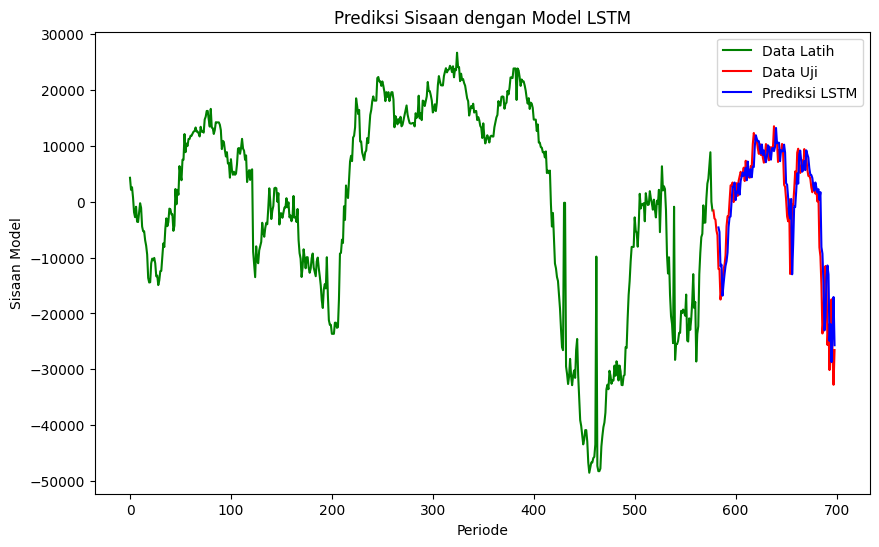

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


# Plot data latih dan data uji beserta prediksi
plt.figure(figsize=(10, 6))
plt.plot(data.index[:train_size], data['Residual'].values[:train_size], label='Data Latih', color='green')
plt.plot(data.index[train_size:], data['Residual'].values[train_size:], label='Data Uji', color='red')
plt.plot(data.index[train_size + seq_length:], predictLSTM, label='Prediksi LSTM', color='blue')
plt.title('Prediksi Sisaan dengan Model LSTM')
plt.xlabel('Periode')
plt.ylabel('Sisaan Model')
plt.legend()
plt.show()



In [ ]:
# Cek MAPE

from sklearn.metrics import mean_absolute_percentage_error
mapeLSTM = mean_absolute_percentage_error(data['Residual'].values[train_size + seq_length:], predictLSTM)
print('MAPE:', mapeLSTM)

MAPE: 1.8517806938163663


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

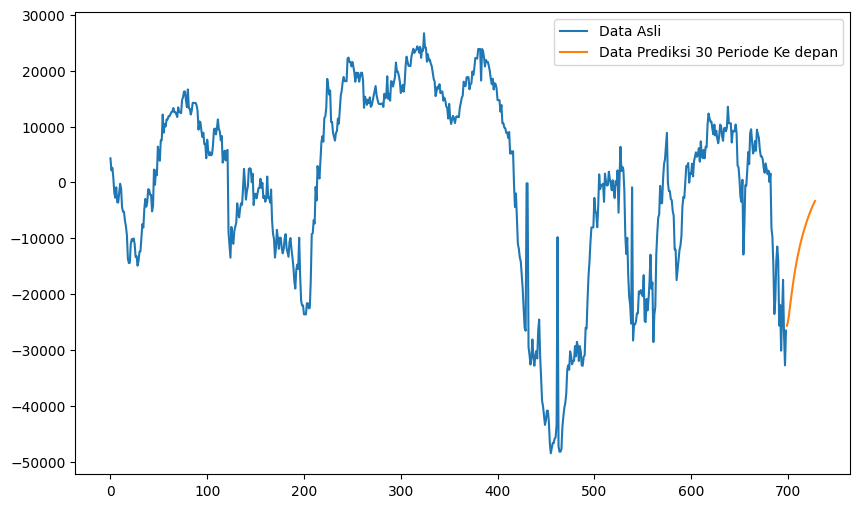

In [ ]:
# Menyiapkan data untuk membuat prediksi ke depan
future_steps = 30
future_data = X_test[-1]  # Menggunakan data terakhir dari data uji sebagai awal untuk prediksi ke depan

# Membuat prediksi ke depan
future_predictions = []
for i in range(future_steps):
    prediction = model.predict(future_data.reshape(1, seq_length - 1, 1))
    future_predictions.append(prediction[0, 0])
    future_data = np.append(future_data[1:], prediction[0])  # Memperbarui data untuk prediksi berikutnya

# Invers transform hasil prediksi ke skala aslinya
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Menampilkan hasil prediksi ke depan
print("Prediksi untuk 30 langkah ke depan:", future_predictions)

# Visualisasi hasil prediksi ke depan bersama dengan data asli
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(time_series_data)), scaler.inverse_transform(time_series_data), label='Data Asli ')
plt.plot(np.arange(len(time_series_data), len(time_series_data) + future_steps), future_predictions, label='Data Prediksi 30 Periode Ke depan')
plt.legend()
plt.show()


In [ ]:
future_predictions = pd.DataFrame(future_predictions)
print(future_predictions)
future_predictions.to_excel("lstm_forecast.xlsx", index=False)

             0
0  -260.164520
1  -236.761932
2  -181.098282
3  -167.132370
4  -108.078728
5   -92.951424
6   -68.164330
7   -52.035202
8   -33.828648
9   -24.675945
10  -13.886195
11   -6.360814
12    1.005709
13    5.480124
14   10.240019
15   13.539869
16   16.589722
17   18.660872
18   20.681131
19   22.106707
20   23.387110
21   24.311474
22   25.158384
23   25.772938
24   26.313686
25   26.717171
26   27.072195
27   27.336994
28   27.565500
29   27.739870


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_excel('Residual.xlsx')
data = data.loc[:, ['Harga', 'Predicted', 'Residual LSTM']]

data['Prediksi LSTM'] = data['Predicted'] - data['Residual LSTM']

test_size = 122
train_data = data.iloc[:-test_size]
test_data = data.iloc[-test_size:]

def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

# Hitung MAPE
mape_value = calculate_mape(test_data['Harga'], test_data['Prediksi LSTM'])
print(f'MAPE: {mape_value:.2f}%')

MAPE: 6.72%
